Test of stable single-cell system, using drag lifetime from JASON model

In [3]:
from NCell import NCell
import numpy as np
R = 6371 # radius of earth in km
alt = 600 # altitude of Starlink satellites (km)
dh = 25 # height of band (km)
V = 4*np.pi*dh*(R+alt)**2 # volume of band
S_i = 0
D_i = 0
N_i = int(2.5e-8*V)
lam = 2000
T = 60
def drag_lifetime(_a, _b, _c):
    return 5
atmosphere = NCell(np.array([S_i]), np.array([D_i]), np.array([N_i]), np.array([alt]), 
                np.array([dh]), np.array([lam]), drag_lifetime)

0.0679691946417477
0.0679691946417477


In [2]:
atmosphere.run_sim(T, dt=0.1)
t = atmosphere.get_t()
S = atmosphere.get_S()[0]
D = atmosphere.get_D()[0]
N = atmosphere.get_N()[0]
C = atmosphere.get_C()[0]

2000.0 0.0 [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
1959.8351685191928 2.163616019172946 [[ 1.15290938e-09  1.15290938e-09 -1.65367777e-04 -1.49658870e-02
  -7.79714493e-02 -1.65368918e-02 -4.13410795e-05  1.15290938e-09
   1.15290938e-09  1.15290938e-09]
 [ 6.54747296e-03  6.54747296e-03  6.42344627e-03  1.25566721e-03
  -1.50745146e-02  1.80769166e-04  6.38210403e-03  6.54747296e-03
   6.54747296e-03  6.54747296e-03]
 [ 6.44084526e+00  6.44084526e+00  6.44059721e+00  6.43869547e+00
   6.43555346e+00  6.43910889e+00  6.44072124e+00  6.44084526e+00
   6.44084526e+00  6.44084526e+00]
 [ 6.10163871e+01  6.10163871e+01  6.10163457e+01  6.10156429e+01
   6.10144440e+01  6.10157256e+01  6.10163457e+01  6.1

/home/justi_6044/Summer_2022/debris-simulations/Cell.py:162: RuntimeWarning: overflow encountered in double_scalars
  dSdt = n*sigma*v*S
/home/justi_6044/Summer_2022/debris-simulations/Cell.py:165: RuntimeWarning: overflow encountered in double_scalars
  dDdt = n*sigma*v*D
/home/justi_6044/Summer_2022/debris-simulations/Cell.py:164: RuntimeWarning: overflow encountered in double_scalars
  dSdt = self.alpha*n*sigma*v*S
/home/justi_6044/Summer_2022/debris-simulations/Cell.py:191: RuntimeWarning: overflow encountered in double_scalars
  dSDdt = n*sigma*v*S # collisions cannot be avoided
/home/justi_6044/Summer_2022/debris-simulations/Cell.py:192: RuntimeWarning: overflow encountered in double_scalars
  dDDdt = n*sigma*v*D
/home/justi_6044/Summer_2022/debris-simulations/Cell.py:129: RuntimeWarning: invalid value encountered in double_scalars
  D_dt = dSDdt + dDDdt
/home/justi_6044/Summer_2022/debris-simulations/Cell.py:130: RuntimeWarning: invalid value encountered in add
  C_dt = dSdt + d

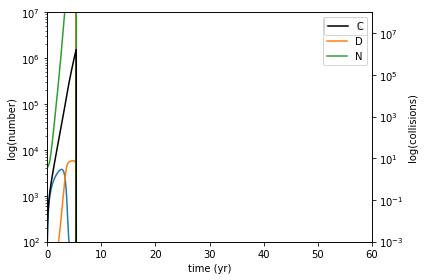

In [4]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.set_xlabel('time (yr)')
ax1.set_ylabel('log(number)')
ax1.set_yscale('log')
ax1.plot(t, S, label='S')
ax1.plot(t, D, label='D')
ax1.plot(t, N, label='N')
ax1.set_ylim(100, 1e7)
ax1.set_xlim(0,T)
ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
ax2.set_ylabel('log(collisions)')  # we already handled the x-label with ax1
ax2.plot(t, C, label='C', color='k')
ax2.set_ylim(1e-3, 1e8)
ax2.set_yscale('log')
ax2.legend()

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

